In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data set

In [ ]:
df = pd.read_csv('Data.csv')
print(df.head())

          X         Y
0  0.987988  5.098368
1  0.719720  2.516654
2 -0.403403  0.337961
3  0.107107  0.737320
4  0.345345 -0.780955


Normalising the feature varaible

In [ ]:
# Manually calculating the mean
sum_X = 0
n = len(df['X'])ogle
Google Mail
https://mail.google.com › mail
No information i
for x in df['X']:
    sum_X += x
mean = sum_X / n

# Manually calculating the standard deviation
sum_squared_diff = 0
for x in df['X']:
    sum_squared_diff += (x - mean) ** 2
std = (sum_squared_diff / n) ** 0.5

# Normalizing the column X
df['X_norm'] = [(x - mean) / std for x in df['X']]

# Store the original values in a new column 'X_without_norm'
df['X_without_norm'] = df['X']

# Update the 'X' column with the normalized values
df['X'] = df['X_norm']

# Output the normalized and original columns
print(df[['X_norm', 'X_without_norm' ,'X']])


       X_norm  X_without_norm         X
0    1.709535        0.987988  1.709535
1    1.245345        0.719720  1.245345
2   -0.698017       -0.403403 -0.698017
3    0.185330        0.107107  0.185330
4    0.597558        0.345345  0.597558
..        ...             ...       ...
995  1.162207        0.671672  1.162207
996 -1.065212       -0.615616 -1.065212
997  0.448601        0.259259  0.448601
998  0.206114        0.119119  0.206114
999  0.639127        0.369369  0.639127

[1000 rows x 3 columns]


Shuffling the data set

In [ ]:

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_ratio = 0.8
crossval_test_ratio = 0.2

# Calculate indices for splitting
train_split_index = int(len(df) * train_ratio)
crossval_test_split_index = train_split_index + int(len(df) * (crossval_test_ratio / 2))

# Split the data
train_df = df_shuffled[:train_split_index]  # Training set (80%)
crossval_df = df_shuffled[train_split_index:crossval_test_split_index]  # Cross-validation set (10%)
test_df = df_shuffled[crossval_test_split_index:]  # Testing set (10%)


Visualising distributions of X and Y

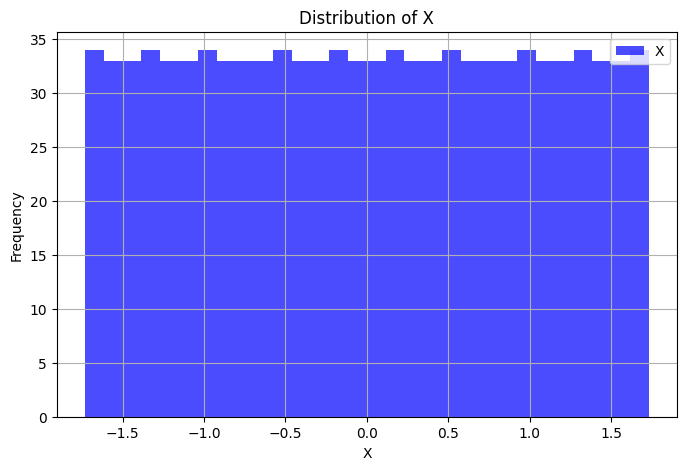

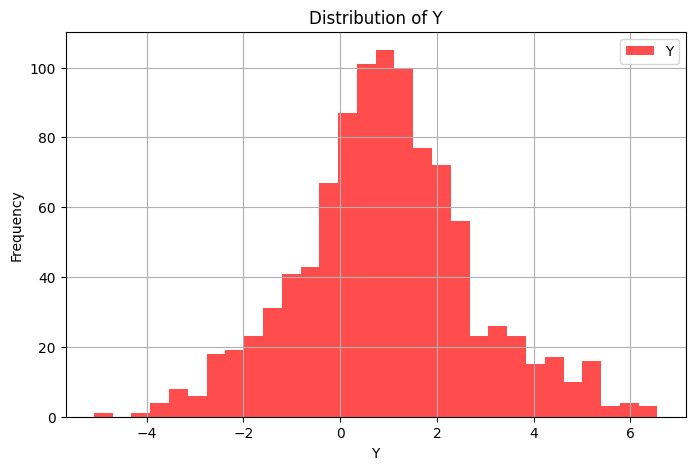

In [ ]:
def plot_distribution(data, feature, title, colour):
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=30, color=colour, alpha=0.7, label=feature)
    plt.title(f"Distribution of {title}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the distributions for 'X' and 'Y'
plot_distribution(df, 'X', 'X',"blue")
plot_distribution(df, 'Y', 'Y' , "red")

In [ ]:
import numpy as np
import pandas as pd

X = train_df['X'].values
Y = train_df['Y'].values

# Generate polynomial features for a given degree (x, x2, x3, ..., xn)
def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

# Prediction for polynomial regression
def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)

# Compute the cost (error function)
def error_function(X, Y, w):
    """Computes the cost for given X, Y, and model parameters w."""
    m = len(Y)
    y_cap = predict(X, w)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2)
    return error

# Gradient descent
def gradient_descent(X, Y, w, alpha, iterations):
    m = len(Y)
    error_array = []

    for i in range(iterations):

        y_cap = predict(X, w)
        gradient = (1 / m) * X.T.dot(y_cap - Y)
        w = w - alpha * gradient
        error = error_function(X, Y, w)
        error_array.append(error)

    return w, error_array


learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
best_results = {}

for degree in range(1, 10):
    X_features = generate_polynomial_features(X, degree)

    best_cost = float('inf')
    best_learning_rate = None

    for alpha in learning_rates:
        w = np.zeros(X_features.shape[1])
        w, error_array = gradient_descent(X_features, Y, w, alpha, 500)


        final_cost = error_array[-1]

        if final_cost < best_cost:
            best_cost = final_cost
            best_learning_rate = alpha

    best_results[degree] = (best_learning_rate, best_cost)


for degree, (alpha, cost) in best_results.items():
    print(f"Best learning rate for degree {degree}: {alpha} with final cost: {cost}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-6-74d3906b8ea6>:21: RuntimeWarning: overflow encountered in square
  error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2)
<ipython-input-6-74d3906b8ea6>:33: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradient


Best learning rate for degree 1: 0.1 with final cost: 0.6797145307090053
Best learning rate for degree 2: 0.5 with final cost: 0.6736793006876364
Best learning rate for degree 3: 0.1 with final cost: 0.4767395029140657
Best learning rate for degree 4: 0.1 with final cost: 0.47653906278312774
Best learning rate for degree 5: 0.01 with final cost: 0.48187902476554206
Best learning rate for degree 6: 0.01 with final cost: 0.48404387247312103
Best learning rate for degree 7: 0.01 with final cost: 0.4795894750591464
Best learning rate for degree 8: 0.001 with final cost: 0.6091404794936413
Best learning rate for degree 9: 0.001 with final cost: 0.5765534506179583


In [ ]:
optimal_learning_rate = 0.0009

Final bias² for degree 1: 1.2540908277709353
Final variance for degree 1: 1.0636611673535492
Final total error for degree 1: 2.3177519951244845
Final bias² for degree 2: 1.1441143695803855
Final variance for degree 2: 1.097158599000759
Final total error for degree 2: 2.2412729685811446
Final bias² for degree 3: 0.5895130880165962
Final variance for degree 3: 0.5546376371109432
Final total error for degree 3: 1.1441507251275393
Final bias² for degree 4: 0.6180903903268012
Final variance for degree 4: 0.5941615689463441
Final total error for degree 4: 1.2122519592731453
Final bias² for degree 5: 0.617239202883406
Final variance for degree 5: 0.6019182285348651
Final total error for degree 5: 1.219157431418271
Final bias² for degree 6: 0.619088454633605
Final variance for degree 6: 0.5994973735296129
Final total error for degree 6: 1.2185858281632178
Final bias² for degree 7: 0.6363688831378468
Final variance for degree 7: 0.6156904699303649
Final total error for degree 7: 1.2520593530682

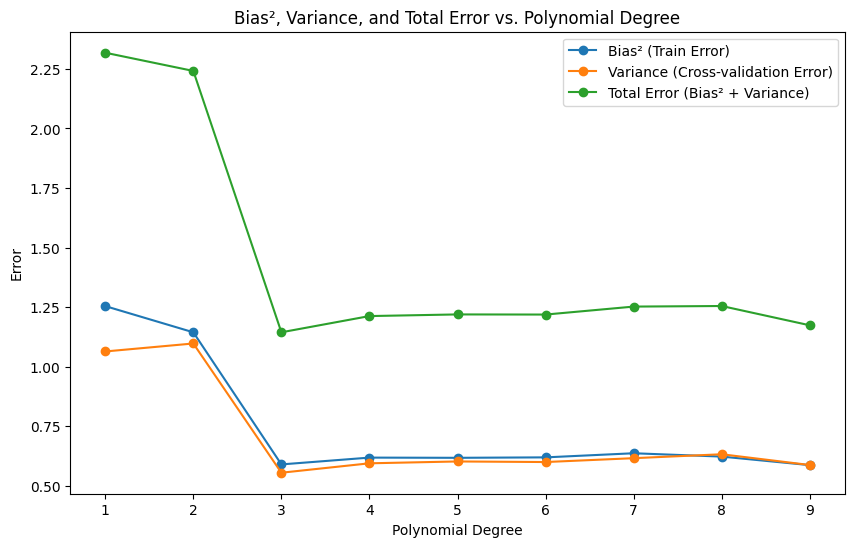

Optimal weights for degree 1: [0.35809506 0.50708808]
Optimal weights for degree 2: [0.29222158 0.50397495 0.28399787]
Optimal weights for degree 3: [0.28785086 0.24672982 0.27391395 0.56338087]
Optimal weights for degree 4: [0.23288791 0.24549832 0.128012   0.56015492 0.13120456]
Optimal weights for degree 5: [0.23372526 0.0948806  0.12795714 0.14464983 0.12840298 0.23938493]
Optimal weights for degree 6: [0.2378623  0.09537072 0.12017404 0.14518837 0.08965349 0.23959734
 0.00764917]
Optimal weights for degree 7: [0.23878011 0.10611459 0.12151204 0.13125474 0.09092998 0.14192418
 0.00708673 0.03600537]
Optimal weights for degree 8: [ 0.23625992  0.10568277  0.1247794   0.13069261  0.11322763  0.14140993
  0.08956721  0.03638754 -0.03617966]
Optimal weights for degree 9: [ 0.23560283  0.09416495  0.12373134  0.12339837  0.11179117  0.16154944
  0.0881699   0.16547615 -0.03529523 -0.05139933]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train = train_df['X'].values
Y_train = train_df['Y'].values

X_cross_validation = crossval_df['X'].values
Y_cross_validation = crossval_df['Y'].values

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)

def error_function(X, Y, w):
    """Computes the cost for given X, Y, and model parameters w."""
    m = len(Y)
    y_cap = predict(X, w)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2)
    return error


def gradient_descent(X, Y, w, alpha, iterations):
    m = len(Y)
    error_array = []

    for i in range(iterations):
        y_cap = predict(X, w)

        gradient = (1 / m) * X.T.dot(y_cap - Y)

        w = w - alpha * gradient

        error = error_function(X, Y, w)
        error_array.append(error)

    return w, error_array

# Hyperparameters
alpha =  optimal_learning_rate# Learning rate --> considering the best learning rates by inspection
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)

# Lists to store bias², variance, total errors, and optimal weights for each degree
bias_squared = []
variance = []
total_errors = []
w_optimal_without_regularization = []  # List to store the final w values for each degree


for degree in degrees:
    X_train_features = generate_polynomial_features(X_train, degree)
    X_cross_validation_features = generate_polynomial_features(X_cross_validation, degree)


    w = np.zeros(X_train_features.shape[1])


    w, train_error_array = gradient_descent(X_train_features, Y_train, w, alpha, iterations)

    w_optimal_without_regularization.append(w)

    # Calculating bias² (train error) and variance (cross-validation error) using the learned weights
    bias2 = error_function(X_train_features, Y_train, w)
    var = error_function(X_cross_validation_features, Y_cross_validation, w)

    # Store the errors for the current degree
    bias_squared.append(bias2)
    variance.append(var)
    total_errors.append(bias2 + var)

    print(f"Final bias² for degree {degree}: {bias2}")
    print(f"Final variance for degree {degree}: {var}")
    print(f"Final total error for degree {degree}: {bias2 + var}")

# Plot Bias², Variance, and Total Error vs. Polynomial Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared, label='Bias² (Train Error)', marker='o')
plt.plot(degrees, variance, label='Variance (Cross-validation Error)', marker='o')
plt.plot(degrees, total_errors, label='Total Error (Bias² + Variance)', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias², Variance, and Total Error vs. Polynomial Degree')
plt.legend()
plt.show()

# Print the optimal weights for each degree
for degree, w_optimal in zip(degrees, w_optimal_without_regularization):
    print(f"Optimal weights for degree {degree}: {w_optimal}")


Final bias² for degree 1, lambda 0.0001: 1.254091
Final variance for degree 1, lambda 0.0001: 1.063661
Final total error for degree 1, lambda 0.0001: 2.317752
Final bias² for degree 1, lambda 0.0003: 1.254091
Final variance for degree 1, lambda 0.0003: 1.063662
Final total error for degree 1, lambda 0.0003: 2.317752
Final bias² for degree 1, lambda 0.0008: 1.254091
Final variance for degree 1, lambda 0.0008: 1.063662
Final total error for degree 1, lambda 0.0008: 2.317753
Final bias² for degree 1, lambda 0.0022: 1.254091
Final variance for degree 1, lambda 0.0022: 1.063664
Final total error for degree 1, lambda 0.0022: 2.317756
Final bias² for degree 1, lambda 0.0060: 1.254092
Final variance for degree 1, lambda 0.0060: 1.063670
Final total error for degree 1, lambda 0.0060: 2.317762
Final bias² for degree 1, lambda 0.0167: 1.254095
Final variance for degree 1, lambda 0.0167: 1.063684
Final total error for degree 1, lambda 0.0167: 2.317780
Final bias² for degree 1, lambda 0.0464: 1.254

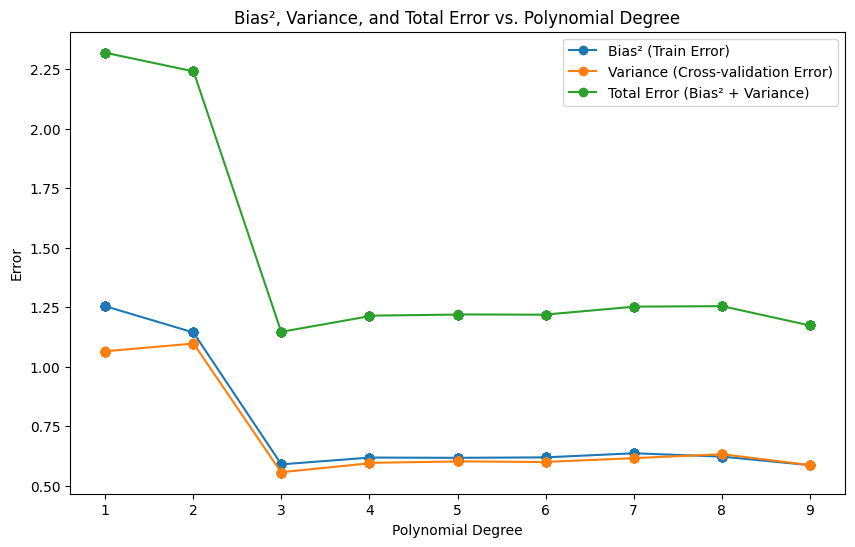

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_train = train_df['X'].values
Y_train = train_df['Y'].values

X_cross_validation = crossval_df['X'].values
Y_cross_validation = crossval_df['Y'].values

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T


def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)


def error_function(X, Y, w, lambd):
    """Computes the cost for given X, Y, and model parameters w, with L2 regularization."""
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)

    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

def gradient_descent(X, Y, w, alpha, iterations, lambd):
    m = len(Y)
    error_array = []

    for i in range(iterations):
        # Compute the predictions
        y_cap = predict(X, w)

        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]

        w = w - alpha * gradient

        error = error_function(X, Y, w, lambd)
        error_array.append(error)

    return w, error_array

# Hyperparameters
alpha = optimal_learning_rate  # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)  # Polynomial degrees from 1 to 9
lambdas = np.logspace(-4, 0, 10)  # 10 values from 10^-4 to 1

# Prepare to store the results
results = {
    "degree": [],
    "lambda": [],
    "bias_squared": [],
    "variance": [],
    "total_error": []
}

for degree in degrees:
    X_train_features = generate_polynomial_features(X_train, degree)
    X_cross_validation_features = generate_polynomial_features(X_cross_validation, degree)

    for lambd in lambdas:
        w = np.zeros(X_train_features.shape[1])

        w, _ = gradient_descent(X_train_features, Y_train, w, alpha, iterations, lambd)

        # Calculate bias² (train error) and variance (cross-validation error)
        bias2 = error_function(X_train_features, Y_train, w, lambd)
        var = error_function(X_cross_validation_features, Y_cross_validation, w, lambd)

        # Store the results for the current degree and lambda
        results["degree"].append(degree)
        results["lambda"].append(lambd)
        results["bias_squared"].append(bias2)
        results["variance"].append(var)
        results["total_error"].append(bias2 + var)

        # Print final costs for each degree and lambda value
        print(f"Final bias² for degree {degree}, lambda {lambd:.4f}: {bias2:.6f}")
        print(f"Final variance for degree {degree}, lambda {lambd:.4f}: {var:.6f}")
        print(f"Final total error for degree {degree}, lambda {lambd:.4f}: {bias2 + var:.6f}")

# Convert results to a NumPy array for easy indexing
degrees = np.array(results["degree"])
bias_squared = np.array(results["bias_squared"])
variance = np.array(results["variance"])
total_errors = np.array(results["total_error"])

# Plot Bias², Variance, and Total Error vs. Polynomial Degree for a specific lambda (for simplicity)
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared[:len(degrees)], label='Bias² (Train Error)', marker='o')
plt.plot(degrees, variance[:len(degrees)], label='Variance (Cross-validation Error)', marker='o')
plt.plot(degrees, total_errors[:len(degrees)], label='Total Error (Bias² + Variance)', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias², Variance, and Total Error vs. Polynomial Degree')
plt.legend()
plt.show()


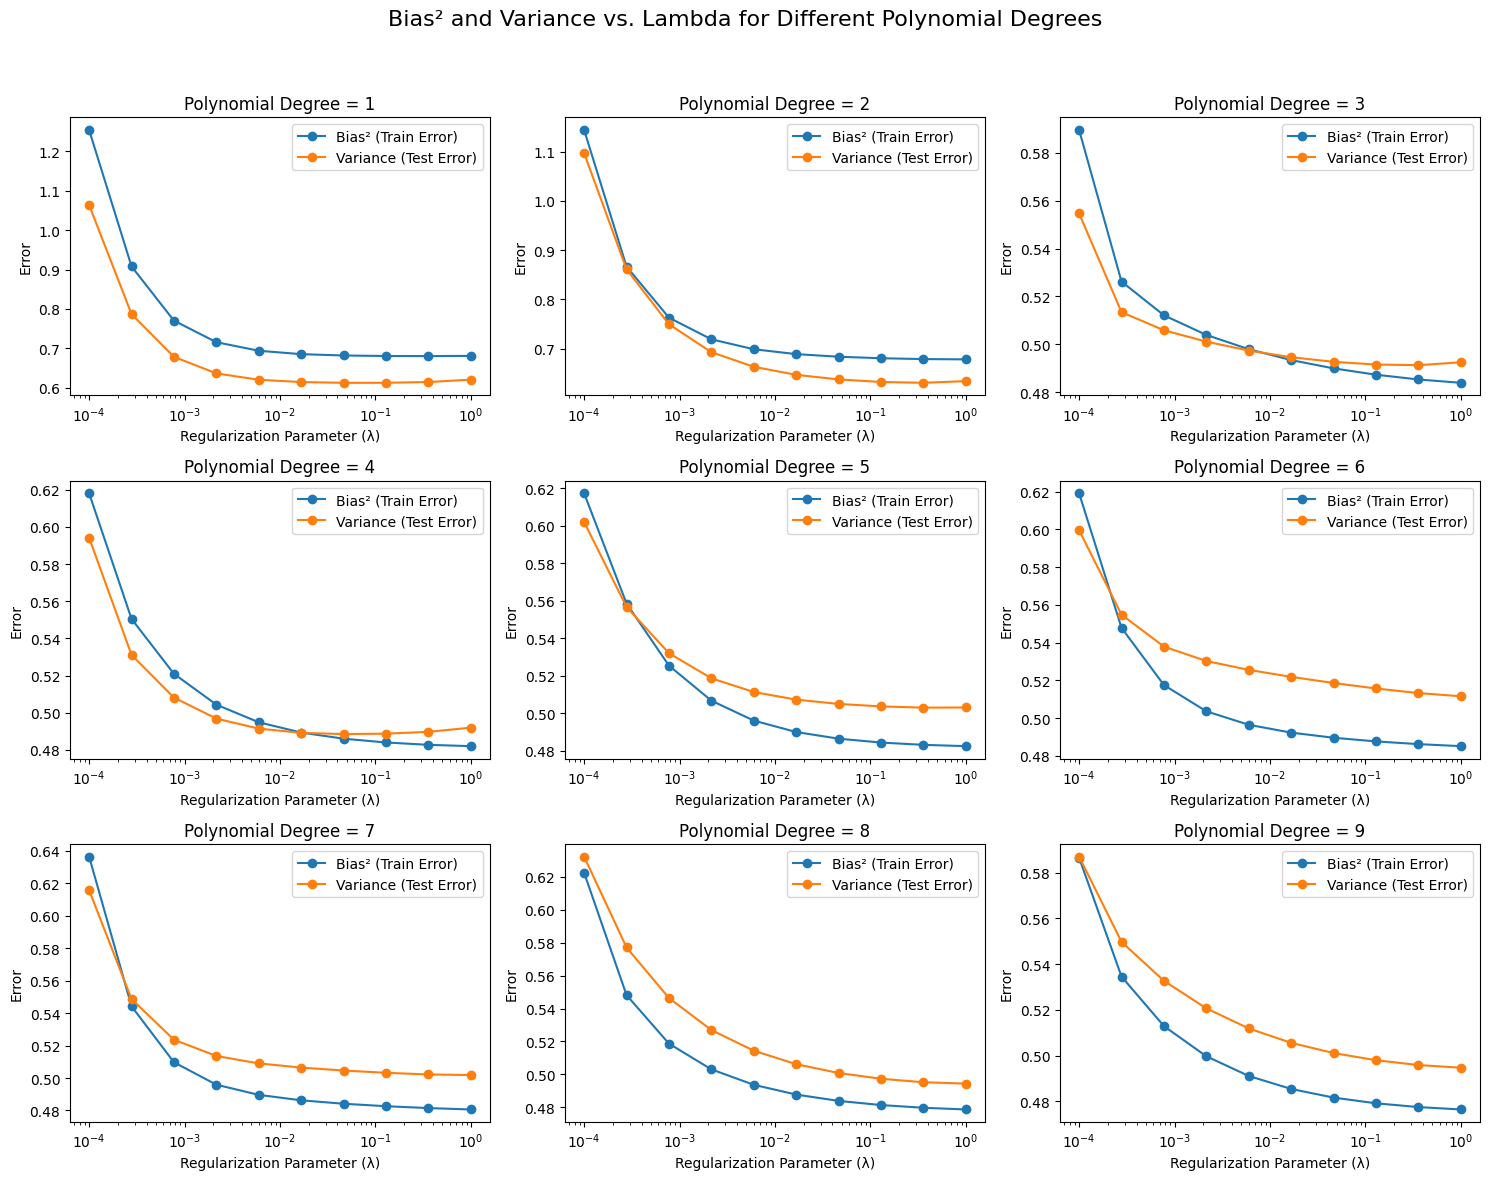

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train = train_df['X'].values
Y_train = train_df['Y'].values

X_cross_validation = crossval_df['X'].values
Y_cross_validation = crossval_df['Y'].values


def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)

def error_function(X, Y, w, lambd):
    """Computes the cost for given X, Y, and model parameters w, with L2 regularization."""
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)

    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

def gradient_descent(X, Y, w, alpha, iterations, lambd):
    m = len(Y)
    error_array = []

    for i in range(iterations):
        # Compute the predictions
        y_cap = predict(X, w)

        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]

        w = w - alpha * gradient

        error = error_function(X, Y, w, lambd)
        error_array.append(error)

    return w, error_array
# Hyperparameters
alpha = optimal_learning_rate # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)  # Polynomial degrees from 1 to 9
lambdas = np.logspace(-4, 0, 10)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Bias² and Variance vs. Lambda for Different Polynomial Degrees', fontsize=16)

for idx, degree in enumerate(degrees):

    bias_squared = []
    variance = []


    X_train_features = generate_polynomial_features(X_train, degree)
    X_cross_validation_features = generate_polynomial_features(X_cross_validation, degree)

    w = np.zeros(X_train_features.shape[1])

    for lambd in lambdas:
        w, train_error_array = gradient_descent(X_train_features, Y_train, w, alpha, iterations, lambd)

        bias2 = error_function(X_train_features, Y_train, w, lambd)
        var = error_function(X_cross_validation_features, Y_cross_validation, w, lambd)

        bias_squared.append(bias2)
        variance.append(var)

    row, col = divmod(idx, 3)

    ax = axes[row, col]
    ax.plot(lambdas, bias_squared, label='Bias² (Train Error)', marker='o')
    ax.plot(lambdas, variance, label='Variance (Test Error)', marker='o')

    ax.set_xscale('log')
    ax.set_xlabel('Regularization Parameter (λ)')
    ax.set_ylabel('Error')
    ax.set_title(f'Polynomial Degree = {degree}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-11-9a9b80f62212>:24: RuntimeWarning: overflow encountered in square
  error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
<ipython-input-11-9a9b80f62212>:22: RuntimeWarning: overflow encountered in square
  regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)
<ipython-input-11-9a9b80f62212>:37: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradient


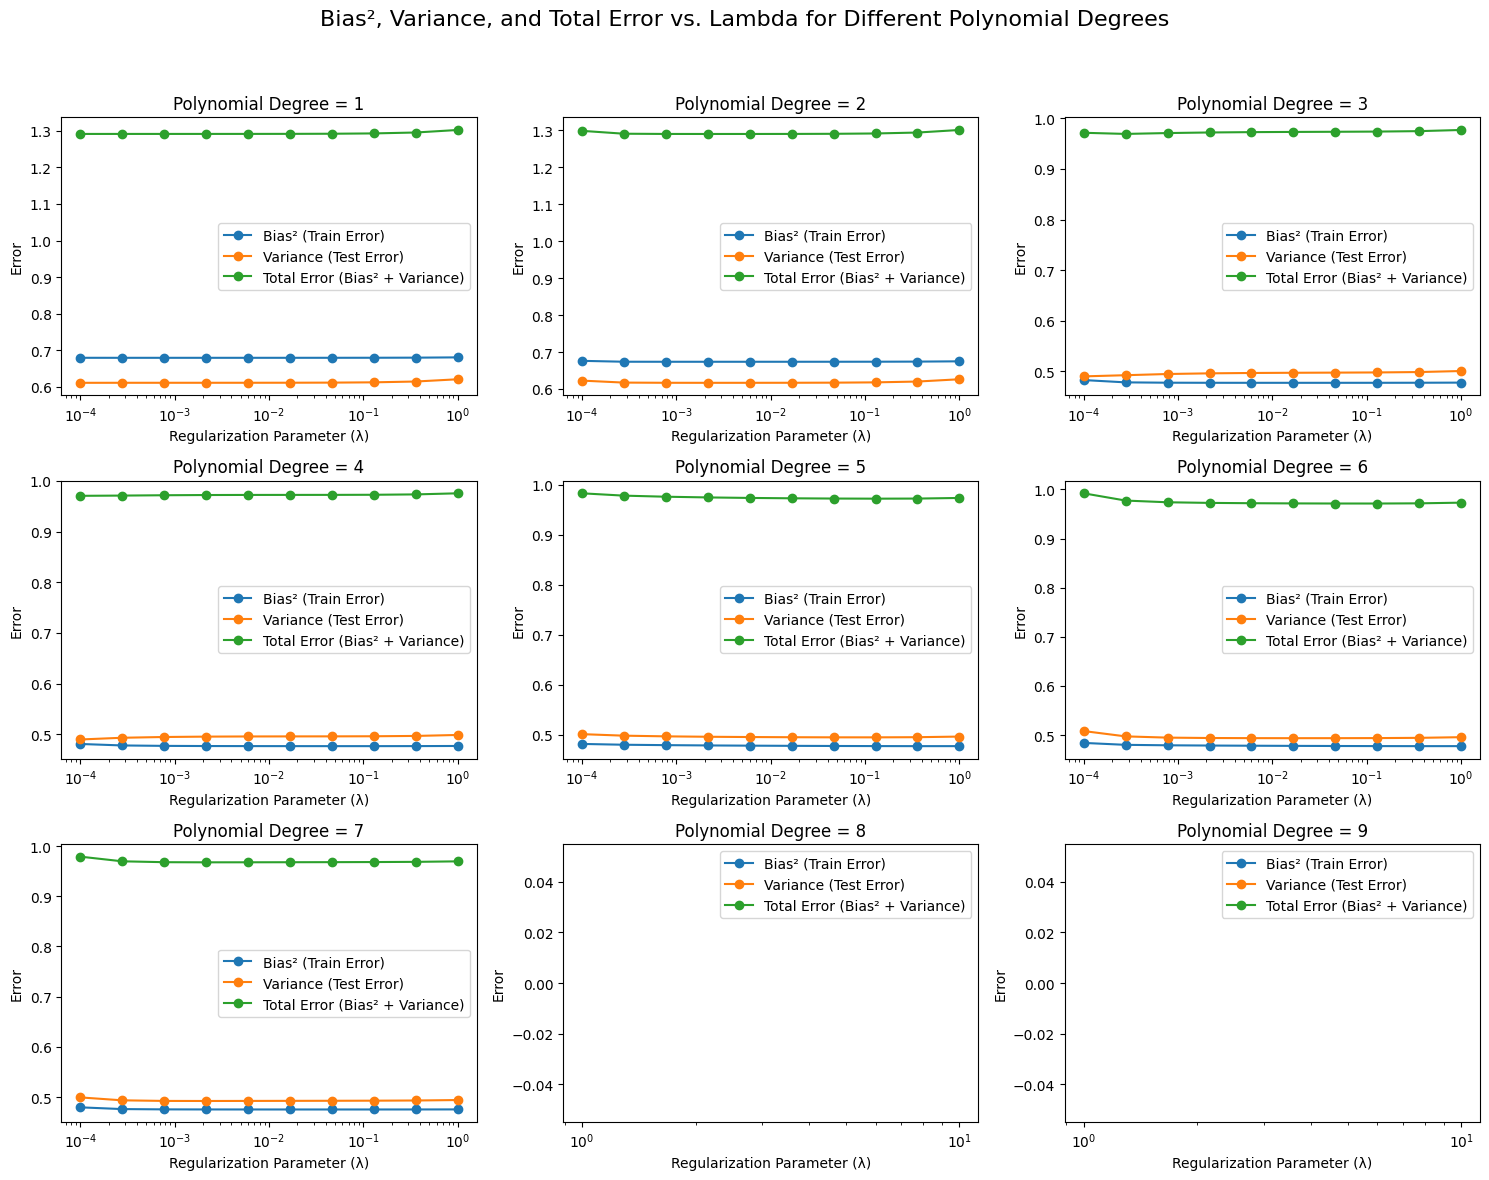

Best lambda for polynomial degree 1: 0.0001
Best lambda for polynomial degree 2: 0.002154434690031882
Best lambda for polynomial degree 3: 0.0002782559402207126
Best lambda for polynomial degree 4: 0.0001
Best lambda for polynomial degree 5: 0.12915496650148828
Best lambda for polynomial degree 6: 0.12915496650148828
Best lambda for polynomial degree 7: 0.002154434690031882
Best lambda for polynomial degree 8: 0.0002782559402207126
Best lambda for polynomial degree 9: 0.0001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train = train_df['X'].values
Y_train = train_df['Y'].values

X_cross_validation = crossval_df['X'].values
Y_cross_validation = crossval_df['Y'].values

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)

def error_function(X, Y, w, lambd):
    """Computes the cost for given X, Y, and model parameters w, with L2 regularization."""
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)

    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

def gradient_descent(X, Y, w, alpha, iterations, lambd):
    m = len(Y)
    error_array = []

    for i in range(iterations):

        y_cap = predict(X, w)

        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]
        w = w - alpha * gradient

        error = error_function(X, Y, w, lambd)
        error_array.append(error)

    return w, error_array

# Hyperparameters
alpha = 0.01  # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)
lambdas = np.logspace(-4, 0, 10)


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Bias², Variance, and Total Error vs. Lambda for Different Polynomial Degrees', fontsize=16)

# Dictionary to store the best lambda for each degree
best_lambdas = {}

for idx, degree in enumerate(degrees):
    bias_squared = []
    variance = []
    total_errors = []

    X_train_features = generate_polynomial_features(X_train, degree)
    X_cross_validation_features = generate_polynomial_features(X_cross_validation, degree)

    w = np.zeros(X_train_features.shape[1])

    for lambd in lambdas:
        w, train_error_array = gradient_descent(X_train_features, Y_train, w, alpha, iterations, lambd)

        bias2 = error_function(X_train_features, Y_train, w, lambd)
        var = error_function(X_cross_validation_features, Y_cross_validation, w, lambd)
        total_error = bias2 + var

        bias_squared.append(bias2)
        variance.append(var)
        total_errors.append(total_error)

    best_lambda_idx = np.argmin(total_errors)
    best_lambda = lambdas[best_lambda_idx]
    best_lambdas[degree] = best_lambda

    row, col = divmod(idx, 3)

    # Plot Bias², Variance, and Total Error vs. Lambda for the current polynomial degree
    ax = axes[row, col]
    ax.plot(lambdas, bias_squared, label='Bias² (Train Error)', marker='o')
    ax.plot(lambdas, variance, label='Variance (Test Error)', marker='o')
    ax.plot(lambdas, total_errors, label='Total Error (Bias² + Variance)', marker='o')

    ax.set_xscale('log')
    ax.set_xlabel('Regularization Parameter (λ)')
    ax.set_ylabel('Error')
    ax.set_title(f'Polynomial Degree = {degree}')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

for degree, best_lambda in best_lambdas.items():
    print(f"Best lambda for polynomial degree {degree}: {best_lambda}")


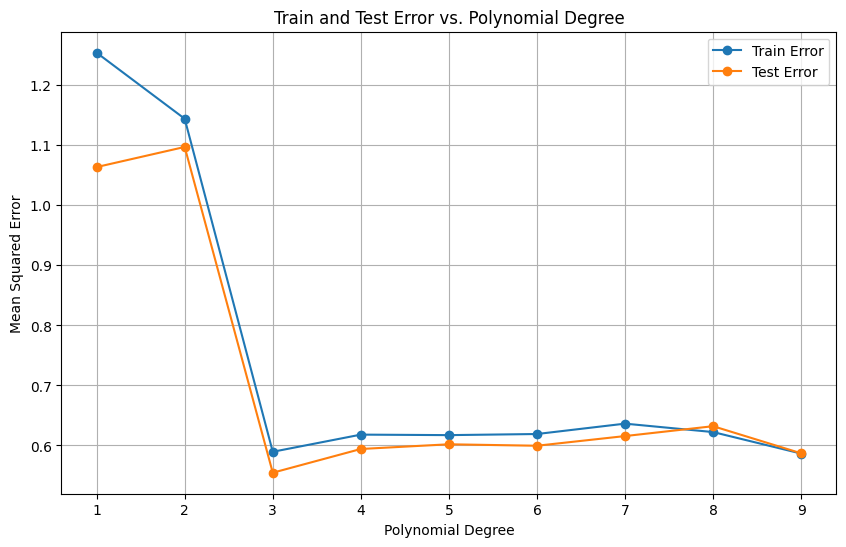

Optimal weights with regularization for degree 1: [0.35809506 0.50708807]
Optimal weights with regularization for degree 2: [0.29222161 0.50397467 0.28399771]
Optimal weights with regularization for degree 3: [0.28785086 0.24672981 0.27391393 0.56338084]
Optimal weights with regularization for degree 4: [0.23288791 0.24549832 0.128012   0.56015491 0.13120456]
Optimal weights with regularization for degree 5: [0.23372675 0.09487865 0.12795375 0.14464791 0.12840157 0.23938422]
Optimal weights with regularization for degree 6: [0.23786288 0.09536875 0.12016991 0.14518642 0.08965094 0.2395966
 0.0076507 ]
Optimal weights with regularization for degree 7: [0.23878012 0.10611454 0.12151197 0.13125467 0.09092994 0.14192413
 0.00708676 0.03600541]
Optimal weights with regularization for degree 8: [ 0.23625992  0.10568276  0.12477939  0.1306926   0.11322762  0.14140993
  0.08956721  0.03638754 -0.03617965]
Optimal weights with regularization for degree 9: [ 0.23560283  0.09416494  0.12373134  0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train = train_df['X'].values
Y_train = train_df['Y'].values

X_cross_validation = crossval_df['X'].values
Y_cross_validation = crossval_df['Y'].values

# Best lambda values for each polynomial degree
# best lambda from above best_lambdas

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

# Prediction for polynomial regression
def predict(X, w):
    return X.dot(w)

# Compute the cost (error function) with regularization
def error_function(X, Y, w, lambd):
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

# Gradient descent with regularization
def gradient_descent(X, Y, w, alpha, iterations, lambd):
    m = len(Y)
    for i in range(iterations):
        y_cap = predict(X, w)
        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]
        w = w - alpha * gradient
    return w

# Hyperparameters
alpha = optimal_learning_rate  # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)  # Polynomial degrees from 1 to 9

# Lists to store the train and cross-validation errors for each degree
train_errors = []
cross_validation_errors = []
w_optimal_with_regularization = []  # List to store the final w values for each degree

for degree in degrees:
    X_train_features = generate_polynomial_features(X_train, degree)
    X_cross_validation_features = generate_polynomial_features(X_cross_validation, degree)

    lambd = best_lambdas[degree]

    w = np.zeros(X_train_features.shape[1])

    w = gradient_descent(X_train_features, Y_train, w, alpha, iterations, lambd)

    w_optimal_with_regularization.append(w)

    train_error = error_function(X_train_features, Y_train, w, lambd)
    cross_validation_error = error_function(X_cross_validation_features, Y_cross_validation, w, lambd)

    train_errors.append(train_error)
    cross_validation_errors.append(cross_validation_error)

# Plot Train and Test Error vs. Polynomial Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, cross_validation_errors, label='Test Error', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal weights for each degree
for degree, w_optimal in zip(degrees, w_optimal_with_regularization):
    print(f"Optimal weights with regularization for degree {degree}: {w_optimal}")


Degree 1:
Test error without regularisation: 1.297497902615557
Test error with regularisation (lambda=0.0001): 1.2974980420756719
----------------------------------------
Degree 2:
Test error without regularisation: 1.1852051718262764
Test error with regularisation (lambda=0.002154434690031882): 1.1852090510537356
----------------------------------------
Degree 3:
Test error without regularisation: 0.6618652692212662
Test error with regularisation (lambda=0.0002782559402207126): 0.6618659183480486
----------------------------------------
Degree 4:
Test error without regularisation: 0.6950188250071985
Test error with regularisation (lambda=0.0001): 0.6950190334631972
----------------------------------------
Degree 5:
Test error without regularisation: 0.6946450773430385
Test error with regularisation (lambda=0.12915496650148828): 0.6947232203963697
----------------------------------------
Degree 6:
Test error without regularisation: 0.6968487404536229
Test error with regularisation (lam

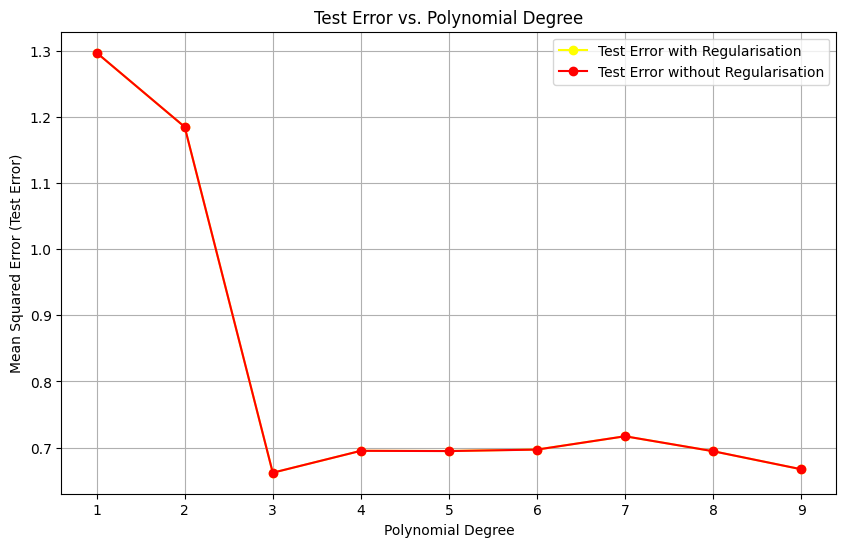

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_test = test_df['X'].values
Y_test = test_df['Y'].values

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    return X.dot(w)

def error_function(X, Y, w, lambd=0):
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

test_errors_without_regularization = []
test_errors_with_regularization = []

# Best lambda values for each polynomial degree (from previous steps)
# best_lambdas numpy


degrees = range(1, 10)

for degree in degrees:
    X_test_features = generate_polynomial_features(X_test, degree)

    w_no_reg = w_optimal_without_regularization[degree - 1]

    w_with_reg = w_optimal_with_regularization[degree - 1]

    lambd = best_lambdas[degree]

    # Compute test error without regularisation (lambda=0)
    test_error_no_reg = error_function(X_test_features, Y_test, w_no_reg, lambd=0)
    test_errors_without_regularization.append(test_error_no_reg)

    # Compute test error with regularization (using best lambda for this degree)
    test_error_with_reg = error_function(X_test_features, Y_test, w_with_reg, lambd=lambd)
    test_errors_with_regularization.append(test_error_with_reg)

    print(f"Degree {degree}:")
    print(f"Test error without regularisation: {test_error_no_reg}")
    print(f"Test error with regularisation (lambda={lambd}): {test_error_with_reg}")
    print("-" * 40)

# Plot Test Error vs. Polynomial Degree for both models
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_errors_with_regularization, label='Test Error with Regularisation', marker='o', color='yellow')

plt.plot(degrees, test_errors_without_regularization, label='Test Error without Regularisation', marker='o',color ='red')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (Test Error)')
plt.title('Test Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find the minimum test error and corresponding model
min_error_no_reg = min(test_errors_without_regularization)
min_error_with_reg = min(test_errors_with_regularization)

# Determine the degree and type of the best model (without regularization)
best_degree_no_reg = test_errors_without_regularization.index(min_error_no_reg) + 1  # Degrees start from 1
best_degree_with_reg = test_errors_with_regularization.index(min_error_with_reg) + 1

# Determine which model has the lowest test error overall
if min_error_no_reg < min_error_with_reg:
    print(f"The best model is WITHOUT regularization for degree {best_degree_no_reg} with test error {min_error_no_reg:.6f}.")
else:
    print(f"The best model is WITH regularization for degree {best_degree_with_reg} with test error {min_error_with_reg:.6f}.")


The best model is WITHOUT regularization for degree 3 with test error 0.661865.


The best model is WITHOUT regularization for degree 3 with test error 0.661865.


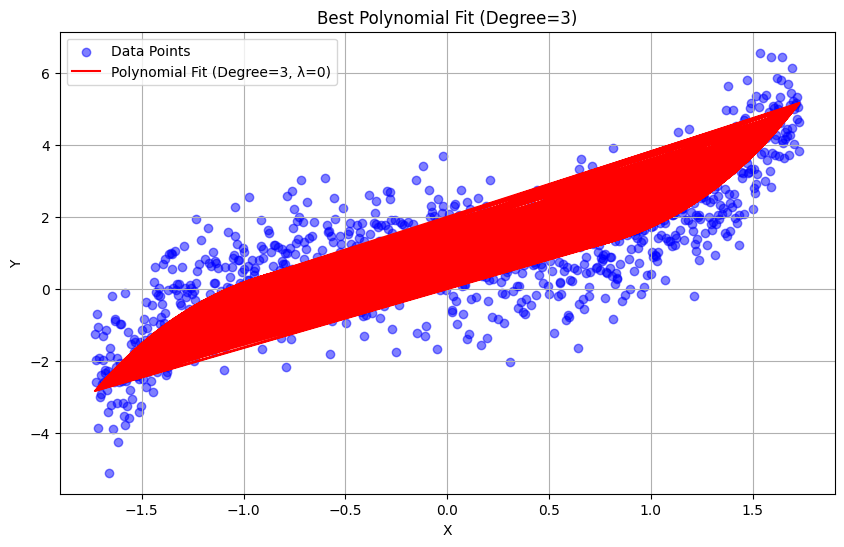

In [ ]:

# Find the minimum test error and corresponding model
min_error_no_reg = min(test_errors_without_regularization)
min_error_with_reg = min(test_errors_with_regularization)

best_degree_no_reg = test_errors_without_regularization.index(min_error_no_reg) + 1  # Degrees start from 1
best_degree_with_reg = test_errors_with_regularization.index(min_error_with_reg) + 1

if min_error_no_reg < min_error_with_reg:
    print(f"The best model is WITHOUT regularization for degree {best_degree_no_reg} with test error {min_error_no_reg:.6f}.")
    best_degree = best_degree_no_reg
    regularization = False
else:
    print(f"The best model is WITH regularization for degree {best_degree_with_reg} with test error {min_error_with_reg:.6f}.")
    best_degree = best_degree_with_reg
    regularization = True

X_train_features = generate_polynomial_features(X, best_degree)

# If regularization is best, use a regularized fit, else use non-regularized fit
if regularization:
    # Regularized fit (using lambda value for regularization)
    lambda_best = lambdas[best_degree_with_reg - 1]  # Assuming lambdas array exists
    w_best = gradient_descent(X_train_features, Y, np.zeros(X_train_features.shape[1]), alpha=0.01, iterations=2000, lambd=lambda_best)
else:

    w_best = gradient_descent(X_train_features, Y, np.zeros(X_train_features.shape[1]), alpha=0.01, iterations=2000, lambd=0)

X_features = generate_polynomial_features(X, best_degree)

# Generate predictions
y_pred = predict(X_features, w_best)

# Plot the data points and the best-fit polynomial
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.5)
plt.plot(X, y_pred, color='red', label=f'Polynomial Fit (Degree={best_degree}, λ={lambda_best if regularization else 0})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Best Polynomial Fit (Degree={best_degree})')
plt.legend()
plt.grid(True)
plt.show()


Degree 1 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 2 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 3 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 4 - Shapes: (20, 20) (20, 20) (20, 20)


<ipython-input-15-ec1d744e5360>:25: RuntimeWarning: overflow encountered in square
  regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)  # No regularization for bias term
<ipython-input-15-ec1d744e5360>:26: RuntimeWarning: overflow encountered in square
  error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization


Degree 5 - Shapes: (20, 20) (20, 20) (20, 20)


<ipython-input-15-ec1d744e5360>:36: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * gradient


Degree 6 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 7 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 8 - Shapes: (20, 20) (20, 20) (20, 20)
Degree 9 - Shapes: (20, 20) (20, 20) (20, 20)


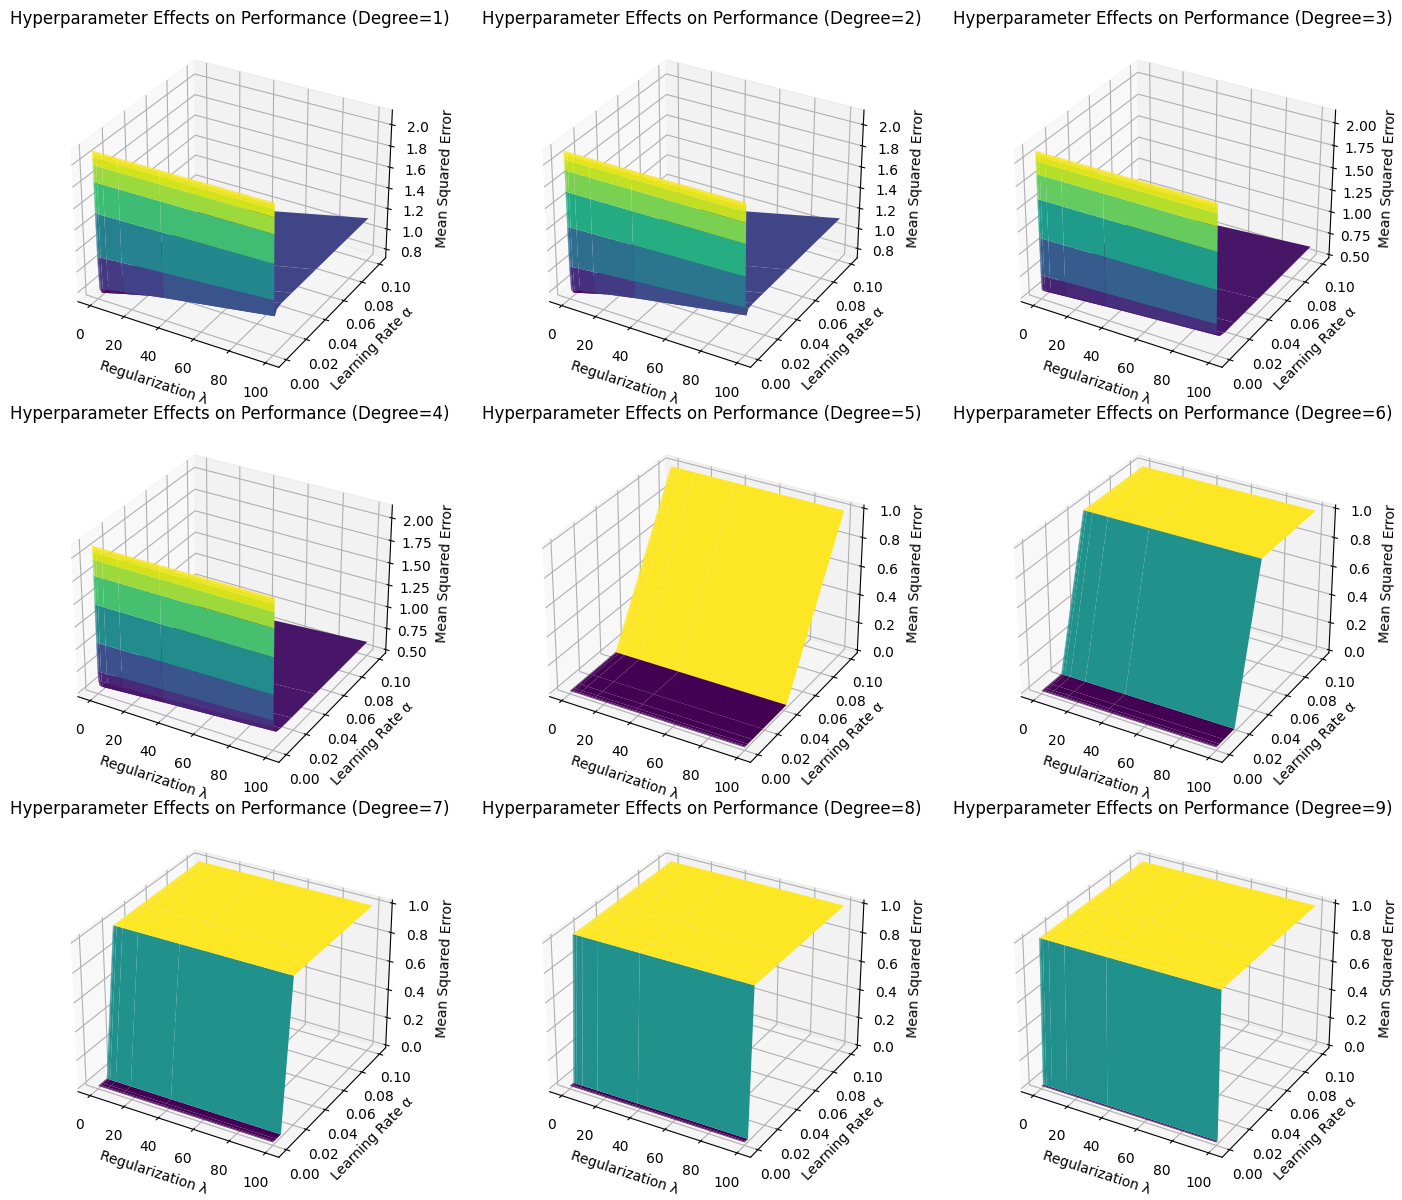

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_shuffled is already defined with columns 'X' and 'Y'
X = df_shuffled['X'].values
Y = df_shuffled['Y'].values

# Train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def generate_polynomial_features(X, degree):
    """Generate polynomial features for the input X up to a given degree."""
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    """Make predictions based on polynomial features and weights."""
    return X.dot(w)

def error_function(X, Y, w, lambd):
    """Compute the mean squared error and regularization penalty."""
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)  # No regularization for bias term
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

def gradient_descent(X, Y, w, alpha, iterations, lambd):
    """Perform gradient descent with L2 regularization (ridge)."""
    m = len(Y)
    for i in range(iterations):
        y_cap = predict(X, w)
        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]  # Regularization on all weights except the bias term
        w = w - alpha * gradient
    return w

# Hyperparameters
alphas = np.logspace(-8, -1, 20)  # From 1e-8 to 1e-1 (more spread across the range)
lambdas = np.logspace(-6, 2, 20 ) # Smaller and more granular regularization strengths
degrees = range(1, 10)  # Polynomial degrees from 1 to 9

# Create a 3D plot for each degree
fig = plt.figure(figsize=(15, 12))

for degree in degrees:
    # Generate polynomial features for both training and test data
    X_train_features = generate_polynomial_features(X_train, degree)
    X_test_features = generate_polynomial_features(X_test, degree)

    # Initialize an array to store mean squared error (MSE) values
    mse_values = np.zeros((len(alphas), len(lambdas)))

    # Loop over different learning rates (alphas) and regularization strengths (lambdas)
    for i, alpha in enumerate(alphas):
        for j, lambd in enumerate(lambdas):
            # Initialize weights with zeros
            w = np.zeros(X_train_features.shape[1])

            # Perform gradient descent
            w = gradient_descent(X_train_features, Y_train, w, alpha, 1000, lambd)

            # Compute and store the mean squared error for the current hyperparameters
            mse_values[i, j] = error_function(X_test_features, Y_test, w, lambd)

    # Replace NaN or inf values with a large value (or other strategy)
    mse_values = np.nan_to_num(mse_values, nan=1e10, posinf=1e10, neginf=1e10)

    # Create a meshgrid for plotting
    X_mesh, Y_mesh = np.meshgrid(lambdas, alphas)

    # Print shapes to ensure they're compatible
    print(f'Degree {degree} - Shapes:', X_mesh.shape, Y_mesh.shape, mse_values.shape)

    # Plot the surface for the current polynomial degree
    ax = fig.add_subplot(3, 3, degree, projection='3d')  # Set projection to 3D
    ax.plot_surface(X_mesh, Y_mesh, mse_values, cmap='viridis')  # Removed .T from mse_values
    ax.set_title(f'Hyperparameter Effects on Performance (Degree={degree})')
    ax.set_xlabel('Regularization λ')
    ax.set_ylabel('Learning Rate α')
    ax.set_zlabel('Mean Squared Error')

plt.tight_layout()
plt.show()


Training and Testing Errors for Polynomial Regression Models of Various Degrees without regularisation:
   Degree  Train Error (Bias²)  Test Error (Variance)
0       1             1.243745               1.274287
1       2             1.150721               1.154790
2       3             0.597117               0.593810
3       4             0.618024               0.630680
4       5             0.617501               0.666361
5       6             0.622957               0.660878
6       7             0.643522               0.677459
7       8             0.633021               0.648254
8       9             0.595873               0.603507


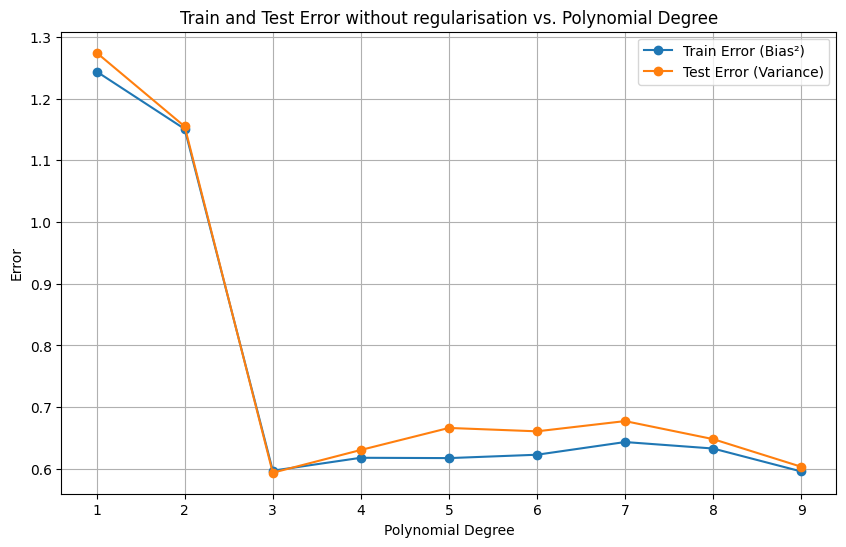

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_shuffled['X'].values
Y = df_shuffled['Y'].values

# Train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    """Computes the hypothesis for a polynomial regression model."""
    return X.dot(w)

def error_function(X, Y, w):
    """Computes the cost for given X, Y, and model parameters w."""
    m = len(Y)
    y_cap = predict(X, w)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2)
    return error

def gradient_descent(X, Y, w, alpha, iterations):
    m = len(Y)
    for i in range(iterations):
        y_cap = predict(X, w)
        gradient = (1 / m) * X.T.dot(y_cap - Y)
        w = w - alpha * gradient
    return w

# Hyperparameters
alpha = optimal_learning_rate  # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)  # Polynomial degrees from 1 to 9

train_errors = []
test_errors = []

for degree in degrees:
    X_train_features = generate_polynomial_features(X_train, degree)
    X_test_features = generate_polynomial_features(X_test, degree)

    w = np.zeros(X_train_features.shape[1])

    w = gradient_descent(X_train_features, Y_train, w, alpha, iterations)

    train_error = error_function(X_train_features, Y_train, w)
    test_error = error_function(X_test_features, Y_test, w)

    train_errors.append(train_error)
    test_errors.append(test_error)

error_data = {
    'Degree': list(degrees),
    'Train Error (Bias²)': train_errors,
    'Test Error (Variance)': test_errors
}
error_df = pd.DataFrame(error_data)

print("Training and Testing Errors for Polynomial Regression Models of Various Degrees without regularisation:")
print(error_df)

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error (Bias²)', marker='o')
plt.plot(degrees, test_errors, label='Test Error (Variance)', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Train and Test Error without regularisation vs. Polynomial Degree')
plt.legend()
plt.grid(True)

plt.show()


Training and Testing Errors for Polynomial Regression Models of Various Degrees with regularisation:
   Degree  Train Error  Test Error
0       1     1.243745    1.274287
1       2     1.150721    1.154792
2       3     0.597118    0.593810
3       4     0.618024    0.630680
4       5     0.617512    0.666399
5       6     0.622968    0.660914
6       7     0.643522    0.677459
7       8     0.633021    0.648254
8       9     0.595873    0.603507


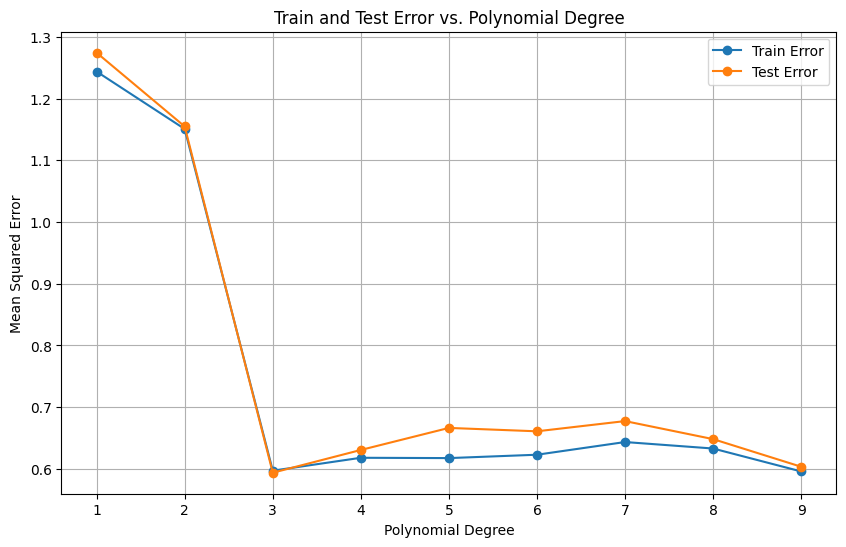

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_shuffled['X'].values
Y = df_shuffled['Y'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



def generate_polynomial_features(X, degree):
    return np.array([X ** i for i in range(degree + 1)]).T

def predict(X, w):
    return X.dot(w)

def error_function(X, Y, w, lambd):
    m = len(Y)
    y_cap = predict(X, w)
    regularization = (lambd / (2 * m)) * np.sum(w[1:] ** 2)
    error = (1 / (2 * m)) * np.sum((y_cap - Y) ** 2) + regularization
    return error

def gradient_descent(X, Y, w, alpha, iterations, lambd):
    m = len(Y)
    for i in range(iterations):
        y_cap = predict(X, w)
        gradient = (1 / m) * X.T.dot(y_cap - Y)
        gradient[1:] += (lambd / m) * w[1:]
        w = w - alpha * gradient
    return w

# Hyperparameters
alpha = optimal_learning_rate # Learning rate
iterations = 500  # Number of iterations for gradient descent
degrees = range(1, 10)  # Polynomial degrees from 1 to 9

# Lists to store the train and test errors for each degree
train_errors = []
test_errors = []

for degree in degrees:
    X_train_features = generate_polynomial_features(X_train, degree)
    X_test_features = generate_polynomial_features(X_test, degree)

    lambd = best_lambdas[degree]

    w = np.zeros(X_train_features.shape[1])

    w = gradient_descent(X_train_features, Y_train, w, alpha, iterations, lambd)

    # Calculate train and test errors (mean squared error with regularization)
    train_error = error_function(X_train_features, Y_train, w, lambd)
    test_error = error_function(X_test_features, Y_test, w, lambd)

    train_errors.append(train_error)
    test_errors.append(test_error)

error_data = {
    'Degree': list(degrees),
    'Train Error': train_errors,
    'Test Error': test_errors
}
error_df = pd.DataFrame(error_data)

# Display the error table
print("Training and Testing Errors for Polynomial Regression Models of Various Degrees with regularisation:")
print(error_df)

# Plot Train and Test Error vs. Polynomial Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()
